In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

In [50]:
def ggen():
    comp = np.random.randint(3,8)
    print(comp)
    val = []
    xx = []
    yy = []
    for i in range(0,comp):
        x = np.random.randint(50,250)
        xx.append(x)
        y = np.random.randint(50)
        yy.append(y)
        value = np.random.normal(loc=x,scale=y,size=10000)
        val.append(list(value))
    sns.distplot(val)
    #plt.show()
    return val, comp, xx, yy

5
6


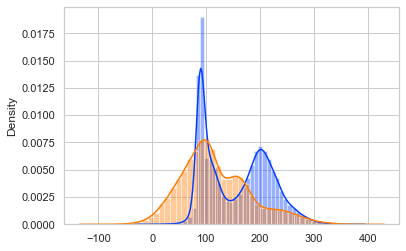

In [60]:
q1, x1 , mean1, std1 = ggen()
q2, x2 , mean2, std2 = ggen()

In [61]:

lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
            
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm
    

In [62]:
print(best_gmmq1.get_params())
print(best_gmmq2.get_params())
print(best_gmmq1.weights_)
print(best_gmmq2.weights_)
print(best_gmmq1.means_)
#print(mean1)
print(best_gmmq2.means_)
#print(mean2)

{'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 6, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
{'covariance_type': 'spherical', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 4, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
[0.1181644  0.21221325 0.12841892 0.27170841 0.2030141  0.06648092]
[0.38668227 0.24844059 0.11883942 0.24603772]
[[171.27488804]
 [ 89.20469162]
 [227.83451744]
 [109.10491451]
 [200.23827518]
 [263.19116486]]
[[ 97.85257611]
 [ 48.00683087]
 [240.20843927]
 [159.44766635]]


In [69]:
x = dict(zip(best_gmmq1.weights_,best_gmmq1.means_))
od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
od1

OrderedDict([(0.2717084085957302, array([109.10491451])),
             (0.2122132481730087, array([89.20469162])),
             (0.20301410363232278, array([200.23827518])),
             (0.12841892370152116, array([227.83451744])),
             (0.11816439926661684, array([171.27488804])),
             (0.0664809166307938, array([263.19116486]))])

In [70]:
y = dict(zip(best_gmmq2.weights_,best_gmmq2.means_))
od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
od2

OrderedDict([(0.38668226546139506, array([97.85257611])),
             (0.24844059099563975, array([48.00683087])),
             (0.24603772487276238, array([159.44766635])),
             (0.1188394186701977, array([240.20843927]))])

In [88]:
minsize=min(len(od1),len(od2))
od1 = dict(od1).items()
od1 = list(od1)[:minsize]
od2 = dict(od2).items()
od2 = list(od2)[:minsize]
od2

[(0.38668226546139506, array([97.85257611])),
 (0.24844059099563975, array([48.00683087])),
 (0.24603772487276238, array([159.44766635])),
 (0.1188394186701977, array([240.20843927]))]

In [104]:
odd1 = []
odd2 = []
for i in range(minsize):
    odd1.append(od1[i][0] * od1[i][1][0])
    odd2.append(od2[i][0] * od2[i][1][0])
odd1 = np.asarray(odd1)
odd2 = np.asarray(odd2)


array([-8.19313312,  7.00357193,  1.42105288,  0.71203223])

Manhattan

In [116]:
distm = abs(odd1-odd2)
distm

array([8.19313312, 7.00357193, 1.42105288, 0.71203223])

Euclidean

In [117]:
dist = np.sqrt(abs(odd1**2 - odd2**2))
dist

array([23.5136928 , 14.70071629, 10.65437007,  6.41550179])